# Exercise - Simple Linear Regression



In this notebook you can check your understanding of linear regression and implement a linear regression model with scikit-learn by yourself. 




## Learning Objectives



At the end of this notebook you should be able to 
- describe the relationship between two variables.
- train a linear regression model with scikit-learn.
- interpret the $R^2$ of a linear regression model.

## Question 1 



The scatter plots below show the relationship between height, diameter, and volume of timber in 31 felled black cherry trees. The diameter of the tree is measured 4.5 feet above the ground.  

<img src="images/lin_reg_ex_1.png" width="600">  

**(a) Describe the relationship between volume and height of these trees.**

In [ ]:
# There is no obvious linear relationship between volume and height of the trees.

**(b) Describe the relationship between volume and diameter of these trees.**

In [ ]:
# There seems to be a linear relationship between volume and diameter of the trees.

**(c) Suppose you measured the height and diameter of another black cherry tree. Which of these variables would be better for predicting the wood volume of this tree using a simple linear regression model? Explain your reasoning.**

In [ ]:
# There is a linear regression between volume and diameter of the trees. So we can predict the volume of a tree from the diameter, and vice versa the diameter from the volume.
# If I want to predict the volume of a tree using a simple linear regression model, my target variable would be the volume.
# In the second graph, I can see that there is a relationship between diameter and volume. I would then use the diameter to predict the volume with a linear regression model.

## Question 2 

The file `utils.csv` in your data folder contains information about the average utility bills for homes of a particular size and the average monthly temperature.  

**(a) Load the data:**

In [2]:
import pandas as pd

data = pd.read_csv('data/utils.csv')

In [24]:
data

,Month,Average Bill,Average Monthly Temperature
0,Jan,148.5,38
1,Feb,136.5,45
2,Mar,117.0,49
3,Apr,91.5,57
4,May,82.5,69
5,Jun,94.5,78
6,Jul,120.0,84
7,Aug,142.5,89
8,Sep,97.5,79
9,Oct,84.0,64


In [25]:
data.shape

(12, 3)

**(b) Make a scatter plot of the data average bill vs average monthly temperature. Which variable would make the most sense as the response variable?**

Text(0, 0.5, 'Avg Bill')

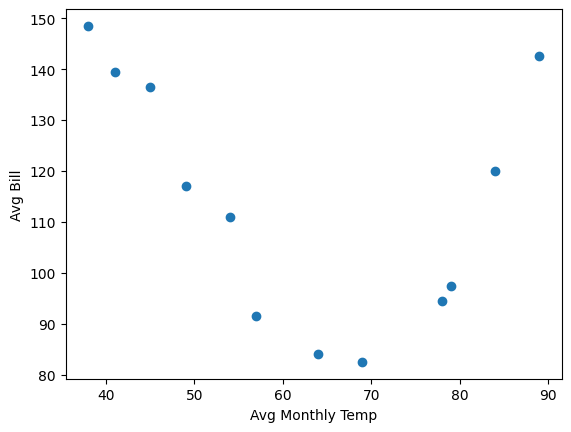

In [40]:
# response variable is y, it should be the Avg Bill
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the variables of interest as scatter plot
plt.scatter(data['Average Monthly Temperature'],data['Average Bill'])
plt.xlabel("Avg Monthly Temp")
plt.ylabel("Avg Bill")


**(c) Have a look at the plot above. How would you describe the relationship between the variables?** 

In [ ]:
# The relationship between the variables: not linear but a curve

**(d) Train a simple linear regression model using scikit-learn**

In [49]:
# Import linear regression from sklearn library
from sklearn.linear_model import LinearRegression

# Prepare data for modeling by defining target and feature
X = data[['Average Monthly Temperature']]  # X needs to be 2-dimensional so we need double brackets here
y = data['Average Bill'] 

# Show dimensions of X
X.shape


(12, 1)

In [50]:
# Instantiate our model 
lin_reg = LinearRegression()

# Train the model using our data
lin_reg.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [51]:
# Intercept and slope/coefficient can be accessed via .intercept_ and .coef_
intercept = lin_reg.intercept_
slope = lin_reg.coef_[0]
print("Model intercept:", intercept)
print("Coefficient for feature Average Temperature:", slope)

Model intercept: 143.62280506779285
Coefficient for feature Average Temperature: -0.4798844187597245


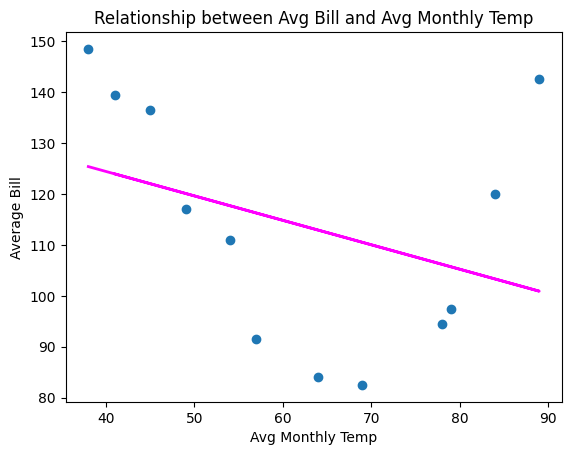

In [52]:
# Plotting our data points
plt.scatter(X, y)

# Adding the fitted regression line of our model
plt.plot(X, X*slope +intercept, '-', color='magenta', linewidth=2)

plt.title("Relationship between Avg Bill and Avg Monthly Temp")
plt.ylabel("Average Bill");
plt.xlabel("Avg Monthly Temp");

**(e) Calculate and interpret the value of $R^2$.**  

In [53]:
# Import r-squared from sklearn
from sklearn.metrics import r2_score

# Calculate the estimated value for each data point
y_hat = lin_reg.predict(X)

# Calculate the R-squared for our model
print("R-squared:", round(r2_score(y, y_hat), 3))

R-squared: 0.124


In [ ]:
# R squared = 0.124
# The R squaured 0.124 looks very bad. It means that our feature Avg Monthly Temp explains only 12 % of the variance in our target variable Avg Bill. 

**(f) Print the intercept and slope/coefficient and interpret them in terms a home owner would understand.**

In [55]:
# Intercept and slope/coefficient can be accessed via .intercept_ and .coef_
intercept = lin_reg.intercept_
slope = lin_reg.coef_[0]
print("Model intercept:", intercept)
print("Coefficient for feature Avg Temp:", slope)

Model intercept: 143.62280506779285
Coefficient for feature Avg Temp: -0.4798844187597245


In [ ]:
# In the cells above we trained the linear regression model on our data. With the values for the intercept and coefficient, the regression line could be added to the scatter plot of our data. 
# We can also interpret the intercept of our model: According to the model, the average Bill with a Temperature of 0, should be ~ 143. 
# The value of the coefficient tells us, that we would expect the average bill to decrease by ~ -0.47 as the average temperature goes up by 1. 

**(g) Use your fitted model to estimate the average utility bill if the average monthly temperature is 120 degrees. Do you think that your answer is reasonable? Why or why not?** 

In [59]:
# Predict the Bill value for Temperature of 120
new_temp = pd.DataFrame({'Average Monthly Temperature': [120]})
y_hat_new = lin_reg.predict(new_temp)


In [60]:
print("Predicted value for new observation:", y_hat_new[0].round(3))

Predicted value for new observation: 86.037


In [ ]:
# If the temperature is 120, the estimate of the average utility bill is 86.
# 120 F = 48 degrees
# We saw from the beginning that the relationship between temperature and utility bills is not perfectly linear. In such cases, a linear model might not accurately capture the relationship.